### ANALYSIS OF STATE VARIABLE MODELS USING CONTROL DESIGN SOFTWARE

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

sys_tf = ct.tf([2, 8, 6], [1, 8, 16, 6])
sys_ss = ct.ss(sys_tf)
print(sys_ss)

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-8.00000000e+00 -1.60000000e+00  6.00000000e-01]
     [ 1.00000000e+01 -7.09653884e-16  7.78284660e-16]
     [ 0.00000000e+00 -1.00000000e+00  0.00000000e+00]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 2.   0.8 -0.6]]

D = [[0.]]


In [2]:
# A=[0 -2; 1 -3]; dt=0.2; Phi=expm(A*dt)
A = np.array([[0, -2], [1, -3]])
dt = 0.2
Phi = expm(A * dt)
print(Phi)

[[ 0.96714146 -0.29682141]
 [ 0.14841071  0.52190934]]


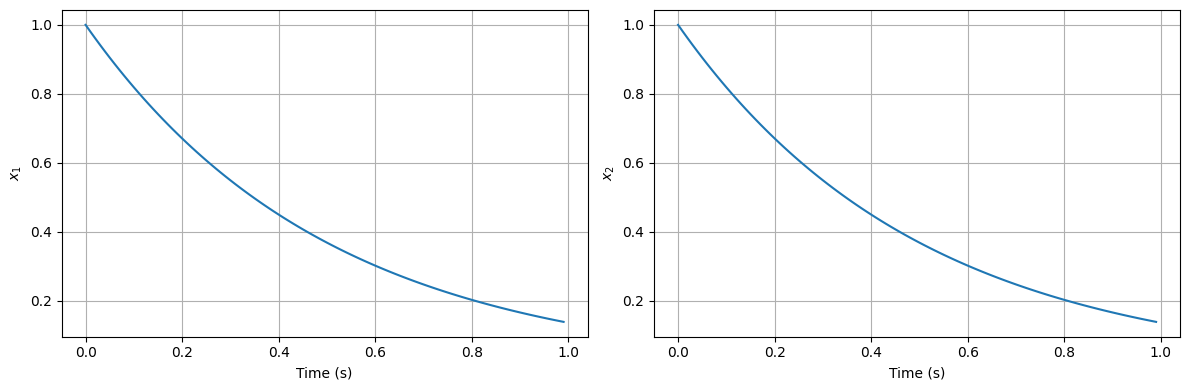

In [3]:
from control.matlab import lsim

A = np.array([[0, -2], [1, -3]])
B = np.array([[2], [0]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys_ss = ct.ss(A, B, C, D)
x0 = np.array([1, 1])
t = np.arange(0, 1, 0.01)
u = np.zeros_like(t)

y_out, t_out, x_out = lsim(sys_ss, U=u, T=t, X0=x0)

# Plot the state variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(t_out, x_out[:, 0])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$x_1$')
ax1.grid(True)

ax2.plot(t_out, x_out[:, 1])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$x_2$')
ax2.grid(True)

plt.tight_layout()
plt.show()